In [1]:
import pandas as pd
import numpy as np

# Visulaization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [61]:
!pip install imblearn

     |████████████████████████████████| 167 kB 6.0 MB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [8]:
#reading data
df = pd.read_excel('ca_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
print('Shape: ', df.shape)

Shape:  (20640, 10)


In [14]:
#check for null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

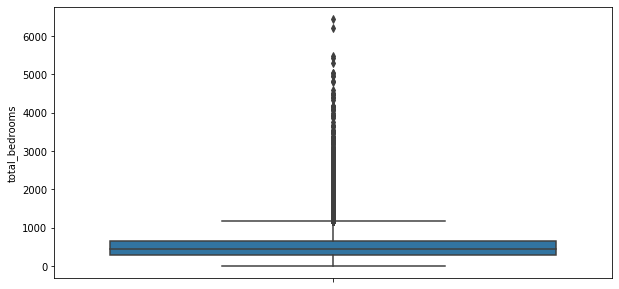

In [11]:
# boxplot on total_bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(y='total_bedrooms',data=df)
plt.plot

In [15]:
df_median_imputed = df.fillna(df.median())

In [16]:
df_median_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
df_median_imputed.describe()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.317393,0.000242,0.110950,0.128779,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,0.465473,0.015563,0.314077,0.334963,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,0.000000,0.000000,0.000000,0.000000,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,0.000000,0.000000,0.000000,0.000000,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,0.000000,0.000000,0.000000,0.000000,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,1.000000,0.000000,0.000000,0.000000,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,1.000000,1.000000,1.000000,1.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


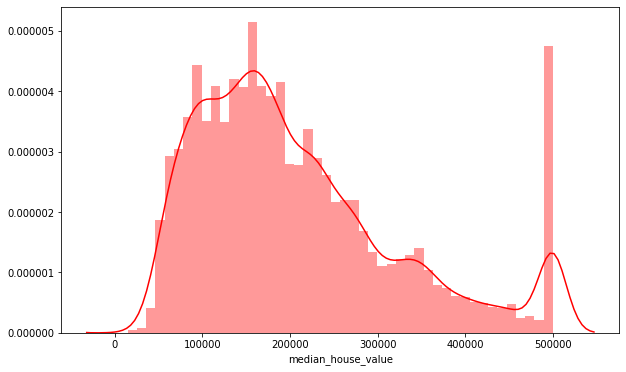

(9.0, 0.0)

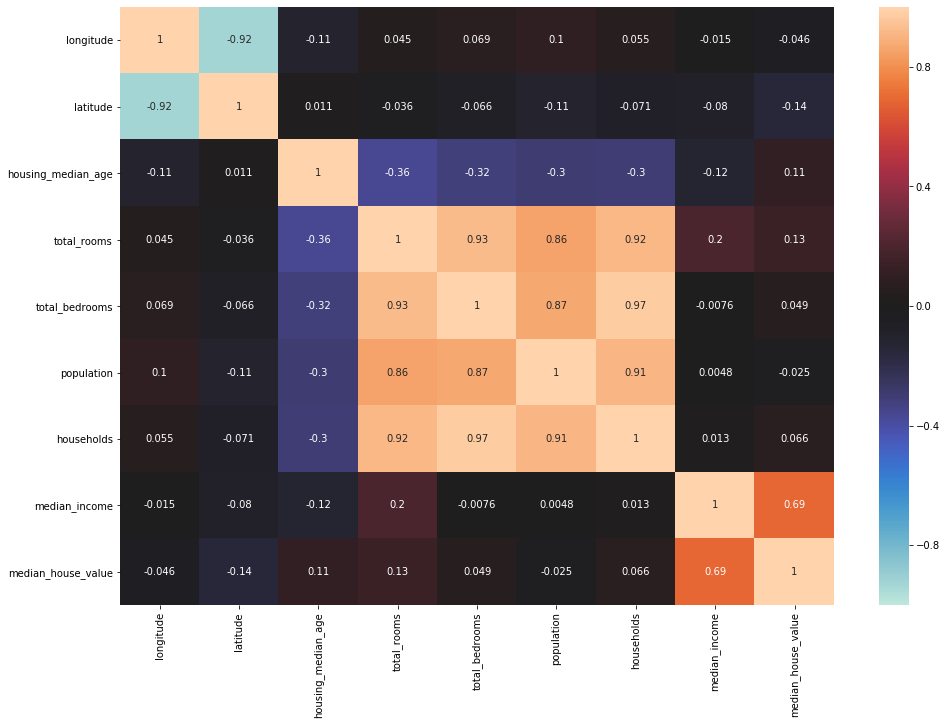

In [17]:
# plt.figure(figsize=(11,7))
# sns.heatmap(cbar=False,annot=True,data=df.corr()*100,cmap='coolwarm')
# plt.title('% Corelation Matrix')
# plt.show()
plt.figure(figsize = (16,11))
ax = sns.heatmap(df_median_imputed.corr(), annot = True, vmin=-1, vmax=1, center= 0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

[]

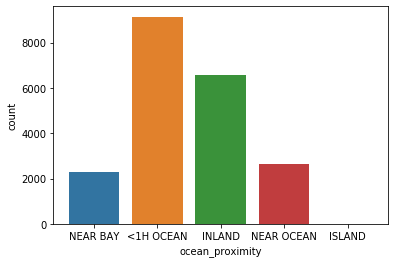

In [18]:
#ocean proximity distribution
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

In [19]:
# converting ocean_proximity to dummies
df_median_imputed =pd.concat([pd.get_dummies(df_median_imputed['ocean_proximity'],drop_first=True),df_median_imputed],axis=1).drop('ocean_proximity',axis=1)


In [20]:
df_median_imputed.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,0,1,0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,0,0,1,0,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,0,0,1,0,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,0,0,1,0,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,0,0,1,0,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [21]:
x=df_median_imputed.drop('median_house_value',axis=1).values
y=df_median_imputed['median_house_value'].values

Train_test split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


MinMax Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_train=ms.fit_transform(X_train)
X_test=ms.transform(X_test)

In [24]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (14448, 12) and size 173376
X_test shape (6192, 12) and size 74304
y_train shape (14448,) and size 14448
y_test shape (6192,) and size 6192


#### Linear Regression

In [25]:
#Linear Regression
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train,y_train)

y_pred = linear_reg.predict(X_test)

In [26]:
print('mse',mean_squared_error(y_test,y_pred)/1000)

print('r2_score',r2_score(y_test,y_pred))

mse 4781688.617036379
r2_score 0.641347386330263


#### RandomForest Regressor

In [27]:
res_random = RandomForestRegressor(n_estimators = 1000)
res_random.fit(X_train,y_train)
rf_pred = res_random.predict(X_test)

In [30]:
print('mse',mean_squared_error(y_test,rf_pred)/1000)
print('r2_score',r2_score(y_test,rf_pred))


mse 2436529.368693194
r2_score 0.8172470655551598
